# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
#Ubuntu headless
#env = UnityEnvironment(file_name='./apps/Tennis_Linux_NoVis/Tennis.x86_64')

#Mac
env = UnityEnvironment(file_name='./apps/Tennis.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.10000000149011612
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

# 5. Init Agent

In [6]:
from collections import deque
from itertools import count
import time
import torch
from ddpg_agent import Agent
import matplotlib.pyplot as plt
%matplotlib inline

agent = Agent(state_size = state_size, action_size = action_size, random_seed = 0, num_agents=2)


In [29]:
# https://github.com/sksq96/pytorch-summary/
from torchsummary import summary
states = 24
actions = 2
summary(agent.actor_local, input_size=(1,states))
#summary(agent.critic_local, input_size=[(1,states),(1,actions)])
#summary doesn't work ¿?

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 512]          12,800
            Linear-2               [-1, 1, 384]         196,992
            Linear-3                 [-1, 1, 2]             770
Total params: 210,562
Trainable params: 210,562
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.80
Estimated Total Size (MB): 0.81
----------------------------------------------------------------


/Users/Rober/anaconda/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [7]:
print("Actor NN: \n-----------\n {} \n {} ".format(agent.actor_local, agent.actor_optimizer))
print("Critic NN: \n-----------\n {} \n {} ".format(agent.critic_local, agent.critic_optimizer))

Actor NN: 
-----------
 Actor(
  (fc1): Linear(in_features=24, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=384, bias=True)
  (fc3): Linear(in_features=384, out_features=2, bias=True)
) 
 Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0001
    weight_decay: 0
) 
Critic NN: 
-----------
 Critic(
  (fcs1): Linear(in_features=24, out_features=512, bias=True)
  (fc2): Linear(in_features=514, out_features=384, bias=True)
  (fc3): Linear(in_features=384, out_features=1, bias=True)
) 
 Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0001
    weight_decay: 0
) 


# 6. Train Agent

In [26]:
def ddpg(n_episodes=3000):
    scores_deque = deque(maxlen=100)
    scores_global = []
        
    for i_episode in range(1, n_episodes+1):
        
        # Keep track of the current timestep
        timestep = time.time()
       
        ###################
        # FOR EACH AGENT  #
        ###################
        env_info = env.reset(train_mode=True)[brain_name]      # reset env    
        states = env_info.vector_observations                  # get current state
        scores = np.zeros(num_agents)                          # init score

        agent.reset()                                          # reset the noise

        score_average = 0
      
        for t in count():
            actions = agent.act(states)                        # get actions (for each state==for each agent)
            env_info = env.step(actions)[brain_name]           # send actions to env
            next_states = env_info.vector_observations         # get next state
            rewards = env_info.rewards                         # get reward
            dones = env_info.local_done                        # get dones
            
            #Step agents (for each state==for each agent)
            agent.step(states, actions, rewards, next_states, dones)

            #update states and scores:
            states = next_states                               # roll over states to next time step
            scores += rewards                                  # update the score (for each agent)            
            
            if np.any(dones):                                  # exit loop if episode finished
                break
        
        score = np.mean(scores)
        scores_deque.append(score)
        score_average = np.mean(scores_deque)
        scores_global.append(score)
        
        #Every N episodes print score
        if i_episode % 10 == 0:
            print('\rEpisode {}, Average Score: {:.2f}, Max: {:.2f}, Min: {:.2f}, Time: {:.2f}'\
              .format(i_episode, score_average, np.max(scores), np.min(scores), time.time() - timestep), end="\n")        
        
        #Every N episodes save the models
        if i_episode % 100 == 0:
            print('.............Saving Checkpoints: Actor & Critic....................')
            torch.save(agent.actor_local.state_dict(), './cp/cp_actor_cc_agent.pth')
            torch.save(agent.critic_local.state_dict(), './cp/cp_critic_cc_agent.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
        
        #The environment is considered solved, 
        # when the scores average (over 100 episodes) is at least +0.5.
        if score_average >= 0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, score_average))            
            print('.............Saving Checkpoints: Actor & Critic....................')
            torch.save(agent.actor_local.state_dict(), './cp/cp_actor_cc_one_agent.pth')
            torch.save(agent.critic_local.state_dict(), './cp/cp_critic_cc_one_agent.pth')
            break            
            
    return scores_global

In [27]:
scores = ddpg()

Episode 10, Average Score: 0.00, Max: 0.00, Min: -0.01, Time: 0.08
Episode 20, Average Score: -0.00, Max: 0.00, Min: -0.01, Time: 0.08
Episode 30, Average Score: -0.00, Max: 0.00, Min: -0.01, Time: 0.08
Episode 40, Average Score: -0.00, Max: 0.00, Min: -0.01, Time: 0.08
Episode 50, Average Score: -0.00, Max: 0.00, Min: -0.01, Time: 0.08
Episode 60, Average Score: -0.00, Max: 0.10, Min: -0.01, Time: 0.18
Episode 70, Average Score: -0.00, Max: 0.00, Min: -0.01, Time: 0.08
Episode 80, Average Score: -0.00, Max: 0.00, Min: -0.01, Time: 0.08
Episode 90, Average Score: -0.00, Max: 0.00, Min: -0.01, Time: 0.08
Episode 100, Average Score: -0.00, Max: 0.00, Min: -0.01, Time: 0.08
.............Saving Checkpoints: Actor & Critic....................
Episode 100	Average Score: -0.00
Episode 110, Average Score: -0.00, Max: 0.00, Min: -0.01, Time: 0.08
Episode 120, Average Score: -0.00, Max: 0.00, Min: -0.01, Time: 0.10
Episode 130, Average Score: -0.00, Max: 0.00, Min: -0.01, Time: 0.08
Episode 140,

# 7. Plot of Rewards  ¶

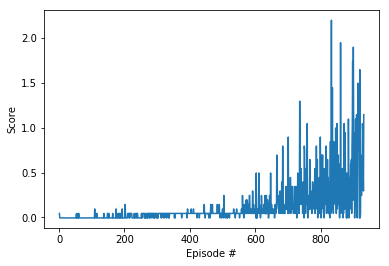

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# 8. Watch the Smart Agent¶

In [8]:
#load the weights from file
agent.actor_local.load_state_dict(torch.load('./cp/cp_actor_cc_agent.pth', map_location='cpu'))
agent.critic_local.load_state_dict(torch.load('./cp/cp_critic_cc_agent.pth', map_location='cpu'))

In [12]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(states)                        # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

/Users/Rober/anaconda/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Total score (averaged over agents) this episode: 2.600000038743019


In [ ]:
env.close()